<a href="https://colab.research.google.com/github/wallisonferreira/data-science-tce/blob/main/Aula_8_Bibliotecas_Adicionais_Notes_Before_Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas Adicionais

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# statsmodels

statsmodels-logo-v2-horizontal.svg

https://www.statsmodels.org/stable/index.html

Biblioteca de classes e funções para estimativa de diversos modelos estatísticos, além de prover mecanismos para testes estatísticos e análise exploratória de dados.

In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import ProbPlot

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/mateusqc/datasets/main/consumo_cerveja.csv', decimal=",");

In [4]:
dataset.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [5]:
# removendo possívels NaN
dataset.dropna(inplace=True)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    float64
 2   Temperatura Minima (C)       365 non-null    float64
 3   Temperatura Maxima (C)       365 non-null    float64
 4   Precipitacao (mm)            365 non-null    float64
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    object 
dtypes: float64(5), object(2)
memory usage: 22.8+ KB


In [7]:
dataset["Consumo de cerveja (litros)"] = dataset["Consumo de cerveja (litros)"].astype(float)

In [8]:
dataset["Consumo de cerveja (litros)"]

0      25.461
1      28.972
2      30.814
3      29.799
4      28.900
        ...  
360    32.307
361    26.095
362    22.309
363    20.467
364    22.446
Name: Consumo de cerveja (litros), Length: 365, dtype: float64

In [9]:
dataset["Data"] = pd.to_datetime(dataset["Data"])

In [10]:
dataset["Data"]

0     2015-01-01
1     2015-01-02
2     2015-01-03
3     2015-01-04
4     2015-01-05
         ...    
360   2015-12-27
361   2015-12-28
362   2015-12-29
363   2015-12-30
364   2015-12-31
Name: Data, Length: 365, dtype: datetime64[ns]

## Regressão Linear Simples

<ipython-input-11-77807633a43d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.iloc[:61].corr(), annot=True)


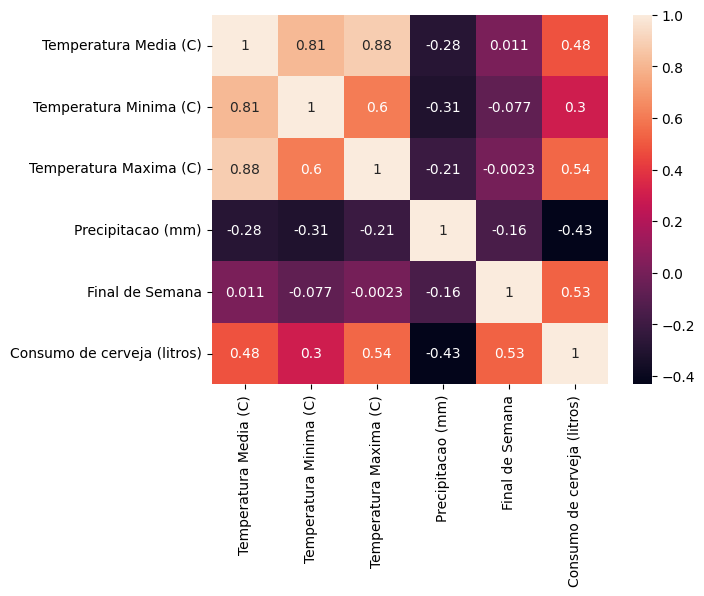

In [11]:
sns.heatmap(dataset.iloc[:61].corr(), annot=True)
plt.show()

In [12]:
# filtrando as colunas que serão utilizadas no experimento de regressão simples
# no caso, serão as colunas "Temperatura Media (C)" (X) e 'Consumo de cerveja (litros)' (Y)
dataset_reg_simples = dataset[['Temperatura Media (C)', 'Consumo de cerveja (litros)']]

# renomeando as colunas para x e y, de forma a tornar significativo o que cada uma representa
dataset_reg_simples = dataset_reg_simples.rename(columns={'Temperatura Media (C)': 'x', 'Consumo de cerveja (litros)': 'y'})

In [13]:
dataset_reg_simples.head()

,x,y
0,27.30,25.461
1,27.02,28.972
2,24.82,30.814
3,23.98,29.799
4,23.82,28.900


In [14]:
# a função .reshape((-1,1)) "força" a coluna X a ficar no formato a ser trabalhado, após a conversão pela numpy (np.array).
# o formato esperado é o de uma matriz de uma "coluna" só, daí o modelo OLS funcionará corretamente

X = np.array(dataset_reg_simples["x"])
Y = np.array(dataset_reg_simples["y"])

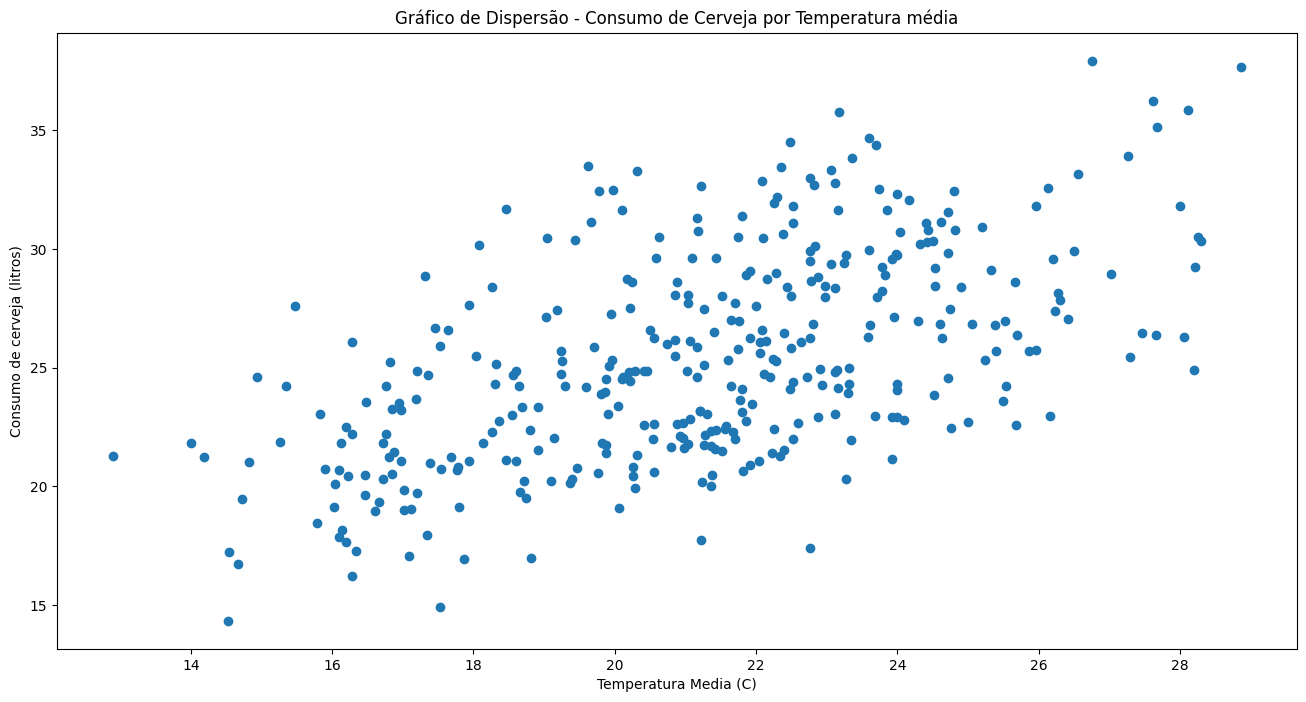

In [15]:
# plotando gráfico dos dados a serem analisados

plt.figure(figsize=(16, 8))
plt.scatter(X,Y)
plt.title("Gráfico de Dispersão - Consumo de Cerveja por Temperatura média")
plt.ylabel("Consumo de cerveja (litros)")
plt.xlabel("Temperatura Media (C)")
plt.show()

Regressão linear simples: Y = a*x + b

In [16]:
# "treinando" o modelo de para obter os valores lecessários.

modelo = sm.OLS(Y, sm.add_constant(X)).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Tue, 30 May 2023   Prob (F-statistic):           1.87e-33
Time:                        22:52:33   Log-Likelihood:                -984.99
No. Observations:                 365   AIC:                             1974.
Df Residuals:                     363   BIC:                             1982.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5289      1.275      6.687      0.0

Neste caso, temos que o formato da equação `Y = β0 + X * β1` é o seguinte:

`Y = 8,5289 + X * 0,7949`

Temos que o `r² = 0.330`, o que significa que o modelo de regressão explica 33,0 % da variância dos dados. Ou seja, representando os dados de uma forma RUIM.

Text(0.5, 1.0, 'Gráfico de Dispersão - Consumo de Cerveja por Temperatura média')

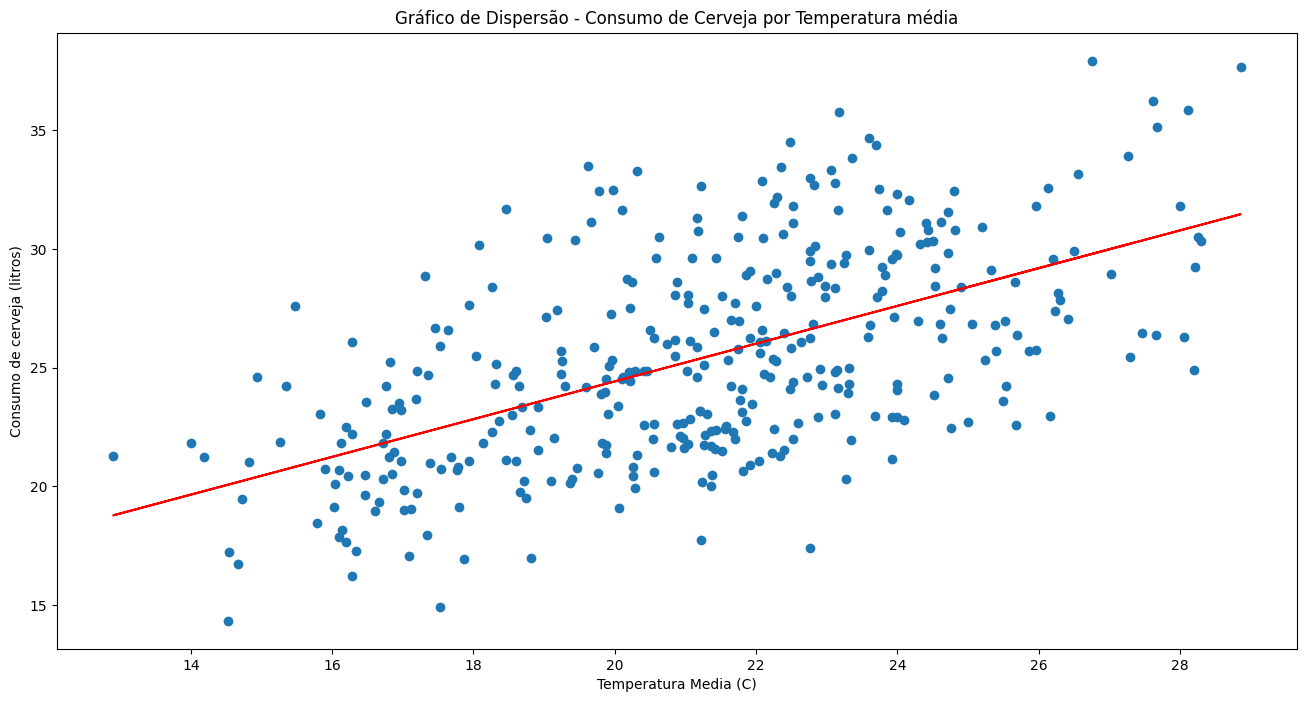

In [17]:
# plotando a reta de regressão gerada, juntamente dos dados

plt.figure(figsize=(16, 8))
plt.scatter(X,Y)
plt.plot(X, modelo.predict(sm.add_constant(X)), color="r")
plt.ylabel("Consumo de cerveja (litros)")
plt.xlabel("Temperatura Media (C)")
plt.title("Gráfico de Dispersão - Consumo de Cerveja por Temperatura média")

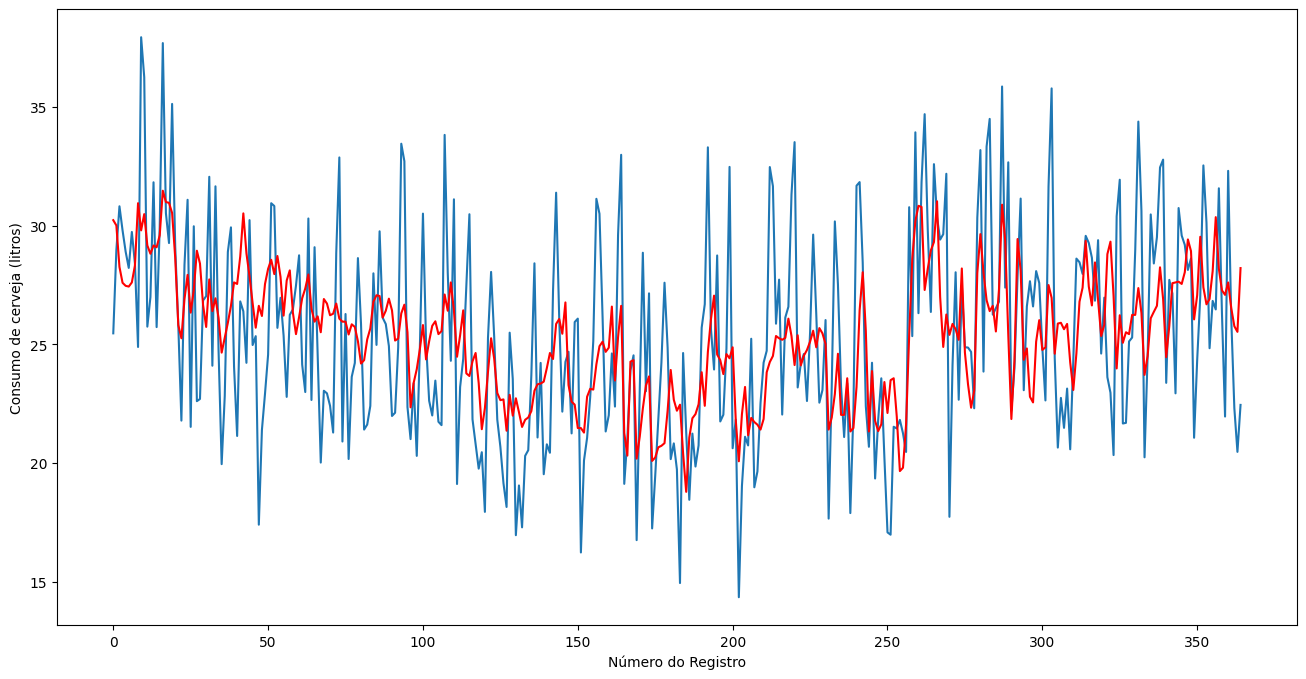

In [18]:
# comparação da forma como os valores originais de Y estão distribuídos em comparação aos gerados

plt.figure(figsize=(16, 8))
x_axis = range(len(Y))
plt.plot(x_axis, Y)
Y_linear = modelo.predict(sm.add_constant(X))
plt.plot(x_axis, Y_linear, color="r")
plt.ylabel("Consumo de cerveja (litros)")
plt.xlabel("Número do Registro")
plt.show()

## Regressão Linear Múltipla

In [19]:
# criando datasets de trabalho, X e Y, contendo apenas as colunas necessárias
# a função to_numpy nos ajuda a adequar os dados à forma adequada

Y = dataset["Consumo de cerveja (litros)"].to_numpy()
X = dataset.drop(["Consumo de cerveja (litros)", "Final de Semana", "Data"], axis = 1).to_numpy()

In [21]:
X

array([[27.3 , 23.9 , 32.5 ,  0.  ],
       [27.02, 24.5 , 33.5 ,  0.  ],
       [24.82, 22.4 , 29.9 ,  0.  ],
       ...,
       [21.68, 20.3 , 24.1 , 10.3 ],
       [21.38, 19.3 , 22.4 ,  6.3 ],
       [24.76, 20.2 , 29.  ,  0.  ]])

In [20]:
modelo_mult = sm.OLS(Y, sm.add_constant(X)).fit()
print(modelo_mult.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     70.73
Date:                Tue, 30 May 2023   Prob (F-statistic):           3.72e-44
Time:                        23:07:32   Log-Likelihood:                -952.29
No. Observations:                 365   AIC:                             1915.
Df Residuals:                     360   BIC:                             1934.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7779      1.186      7.398      0.0

Neste caso, temos que o formato da equação `Y = β0 + X1 * β1 + X2 * β2 + X3 * β3 + X4 * β4` é o seguinte:

`Y = 8.7779 + X1 * 0.0412 + X2 * -0.0749 + X3 * 0.6519 + X4 * -0.0561`

Temos que o `r² = 0.440`, o que significa que o modelo de regressão explica 44,0 % da variância dos dados. Ou seja, representando os dados de uma forma RUIM para RAZOÁVEL.

Text(0.5, 0, 'Número do Registro')

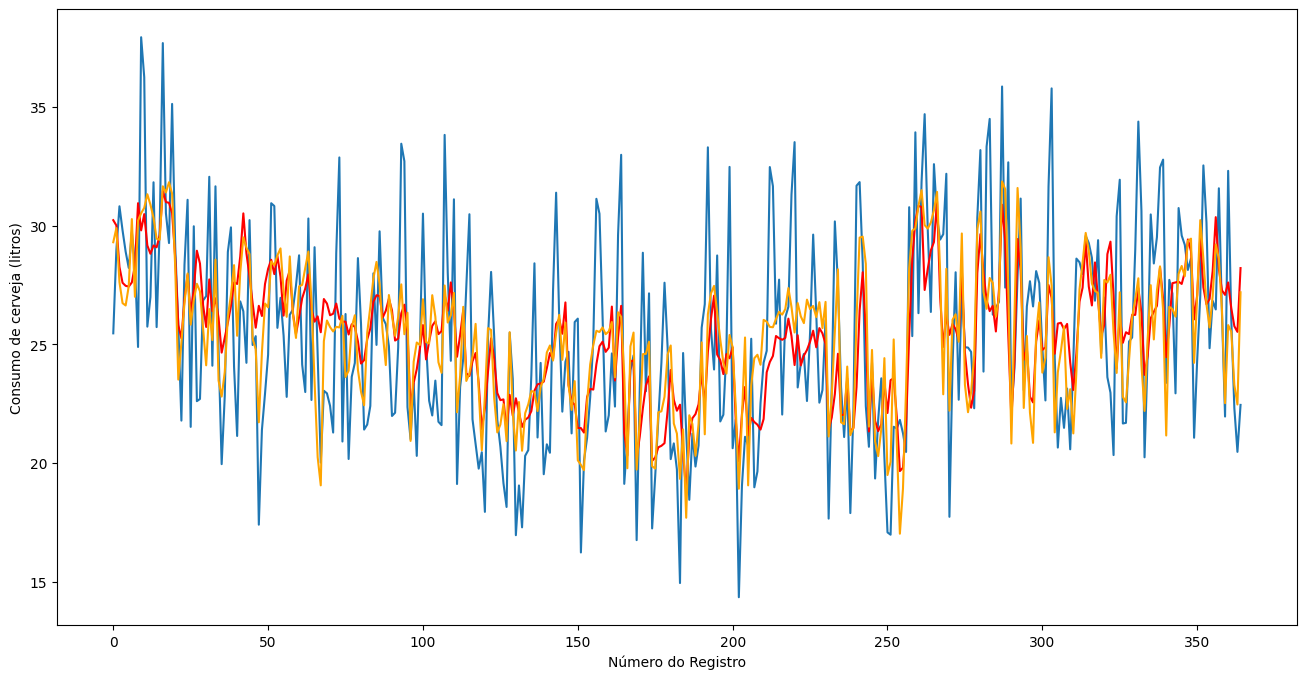

In [22]:
plt.figure(figsize=(16, 8))
x = range(len(Y))
plt.plot(x, Y)
plt.plot(x, Y_linear, color="r")
plt.plot(x, modelo_mult.predict(sm.add_constant(X)), color="orange")
plt.ylabel("Consumo de cerveja (litros)")
plt.xlabel("Número do Registro")

# scipy

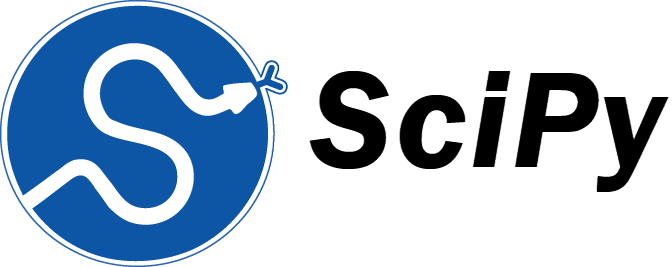

https://docs.scipy.org/doc/scipy/index.html

https://www.statsmodels.org/stable/user-guide.html

É uma biblioteca que agrupa algoritmos matemáticos e funções convenientes. Construído com base no NumPy.

As funções e algoritmos providos são capazes de prover um ambiente para concorrer com o MATLAB, IDL, Octave, R-Lab e SciLab.

Possui artifícios como integral, derivada, constantes matemáticas, funções e fórmulas frequentes na área da física, etc.

### Exemplo - Função Ordinária de Bessel

A função ordinárioa de Bessel descreve o padrão de vibração da pele de um tambor de bateria.

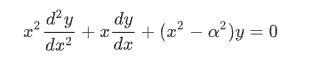

In [23]:
from scipy import special

def drumhead_height(n, k, distance, angle, t):
   kth_zero = special.jn_zeros(n, k)[-1]
   return np.cos(t) * np.cos(n*angle) * special.jn(n, distance*kth_zero)
  
theta = np.r_[0:2*np.pi:50j]
radius = np.r_[0:1:50j]


x = np.array([r * np.cos(theta) for r in radius])
y = np.array([r * np.sin(theta) for r in radius])
z = np.array([drumhead_height(1, 1, r, theta, 0.5) for r in radius])

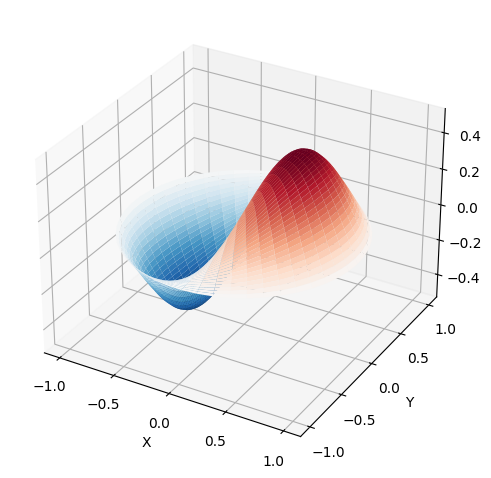

In [24]:
fig = plt.figure()
ax = fig.add_axes(rect=(0, 0.05, 0.95, 0.95), projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='RdBu_r', vmin=-0.5, vmax=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xticks(np.arange(-1, 1.1, 0.5))
ax.set_yticks(np.arange(-1, 1.1, 0.5))
ax.set_zlabel('Z')
plt.show()

## Cálculo Integral

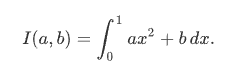

In [25]:
from scipy.integrate import quad

def integrand(x, a, b):
    return a*x**2 + b

a = 2
b = 1

I = quad(integrand, 0, 1, args=(a,b))
I

(1.6666666666666667, 1.8503717077085944e-14)

# Altair

https://altair-viz.github.io/

Biblioteca para visualizações interativas em python.

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         365 non-null    datetime64[ns]
 1   Temperatura Media (C)        365 non-null    float64       
 2   Temperatura Minima (C)       365 non-null    float64       
 3   Temperatura Maxima (C)       365 non-null    float64       
 4   Precipitacao (mm)            365 non-null    float64       
 5   Final de Semana              365 non-null    float64       
 6   Consumo de cerveja (litros)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 22.8 KB


In [27]:
dataset_copy = dataset.copy()
dataset_copy["Final de Semana"] = dataset_copy["Final de Semana"].astype(str)

In [28]:
dataset_copy["Final de Semana"] = dataset_copy["Final de Semana"].apply(lambda x: "Sim" if x == '1.0' else "Não")
dataset_copy["Final de Semana"]

0      Não
1      Não
2      Sim
3      Sim
4      Não
      ... 
360    Sim
361    Não
362    Não
363    Não
364    Não
Name: Final de Semana, Length: 365, dtype: object

In [29]:
import altair as alt

alt.Chart(dataset_copy).mark_circle(size=60).encode(
    x='Temperatura Media (C)',
    y='Consumo de cerveja (litros)',
    color='Final de Semana',
    size='Precipitacao (mm)',
    tooltip=['Data', 'Temperatura Media (C)', 'Precipitacao (mm)', 'Consumo de cerveja (litros)']
).interactive()

alt.Chart(...)

# Plotly

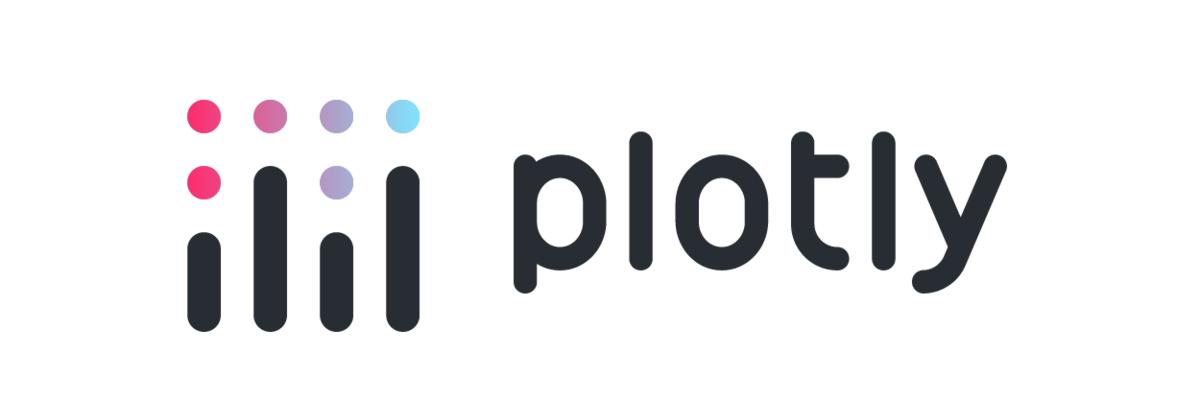

https://plotly.com/python/basic-charts/

Gráficos e mapas interativos para Python, R, Julia, Javascript, ggplot2, F#, MATLAB®, e Dash.

In [30]:
import plotly.express as px

In [31]:
fig = px.scatter(dataset_copy, x="Temperatura Media (C)", y="Consumo de cerveja (litros)", color="Final de Semana",
                 size='Precipitacao (mm)',
                 hover_data=['Data', 'Temperatura Media (C)', 'Precipitacao (mm)', 'Consumo de cerveja (litros)'])
fig.show()

In [32]:
fig = px.scatter(dataset_copy, x="Temperatura Media (C)", y="Consumo de cerveja (litros)", color="Final de Semana",
                 size='Precipitacao (mm)',
                 trendline="ols",
                 hover_data=['Data', 'Temperatura Media (C)', 'Precipitacao (mm)', 'Consumo de cerveja (litros)'])
fig.show()